# Lesson 5: Resolution Limits
This is a guided tutorial designed to illustrate the what a resolution limit in the context of community detection is and illustrates some of the ways we can use to solve the resolution limit 

## Chapter 0:Launching the GUI
As always, we start by starting the GUI with the following command and navigating to the URL. You can go back to Lesson 1: GUI Installation for help with launching the GUI if you need a refresher.
```console
$ docker compose up
```
You should see an output like below.
```
[+] Running 2/2
 ✔ Container gui-cm-frontend-1  Created                                                                                                                                          0.0s
 ✔ Container gui-cm-backend-1   Created                                                                                                                                          0.0s
Attaching to backend-1, frontend-1
backend-1   | INFO:     Will watch for changes in these directories: ['/app/api']
backend-1   | INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
backend-1   | INFO:     Started reloader process [17] using StatReload
frontend-1  |
frontend-1  | Collecting usage statistics. To deactivate, set browser.gatherUsageStats to false.
frontend-1  |
frontend-1  |
frontend-1  |   You can now view your Streamlit app in your browser.
frontend-1  |
frontend-1  |   URL: http://0.0.0.0:8501
frontend-1  |
backend-1   | INFO:     Started server process [19]
backend-1   | INFO:     Waiting for application startup.
backend-1   | INFO:     Application startup complete.
```

Once you can see the GUI in your web browser like below, you've successfully connected to the GUI!

<img src="imgs/gui.png" width="800">

## Chapter 1: Clustering the ring-of-cliques network
A ring-of-cliques network is a graph formed by creating multiple cliques of the same size and arranging them in a ring such that each clique is connected to two other cliques. We can visualize an example of these networks with the graph provided in the data directory.


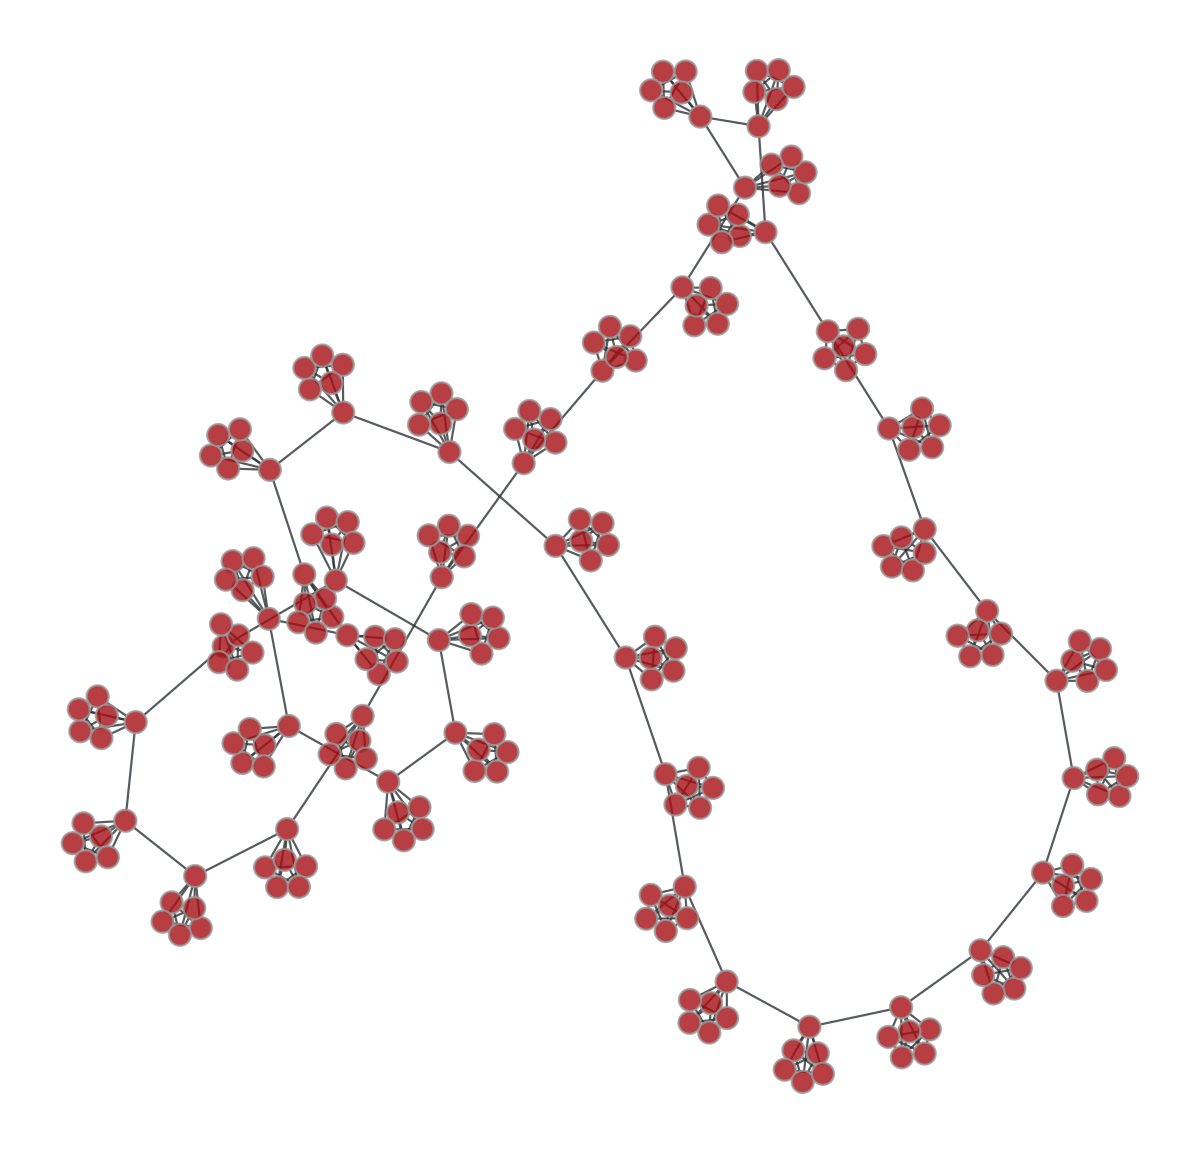

In [1]:
import graph_tool.all as gt
graph = gt.Graph(directed=False)
def edge_list_iterable():
    with open("./data/n_40_k_6.tsv", "r") as f:
        for line in f:
            u,v = line.strip().split()
            yield u,v
vpm_name = graph.add_edge_list(edge_list_iterable(), hashed=True, hash_type="string")
pos = gt.graph_draw(graph)

As you can see, this is a graph with 6 vertices in each clique, and there are 40 of them connecting in a ring, albeit it's not obvious at first that it's a ring.

We can upload this network file to the GUI and get a Leiden-CPM clustering with the following parameters.

<img src="imgs/options.png" width="300">

Once you've clustered the network and downloaded the clustering, let's try to visualize it by coloring each cluster with a unique color. We're picking random colors so everytime, the clusters will be the same but the colors will be different.

In [11]:
import ipywidgets as widgets
leiden_cpm_0_001_clustering = widgets.FileUpload(accept='', multiple=False)
leiden_cpm_0_001_clustering

FileUpload(value=(), description='Upload')

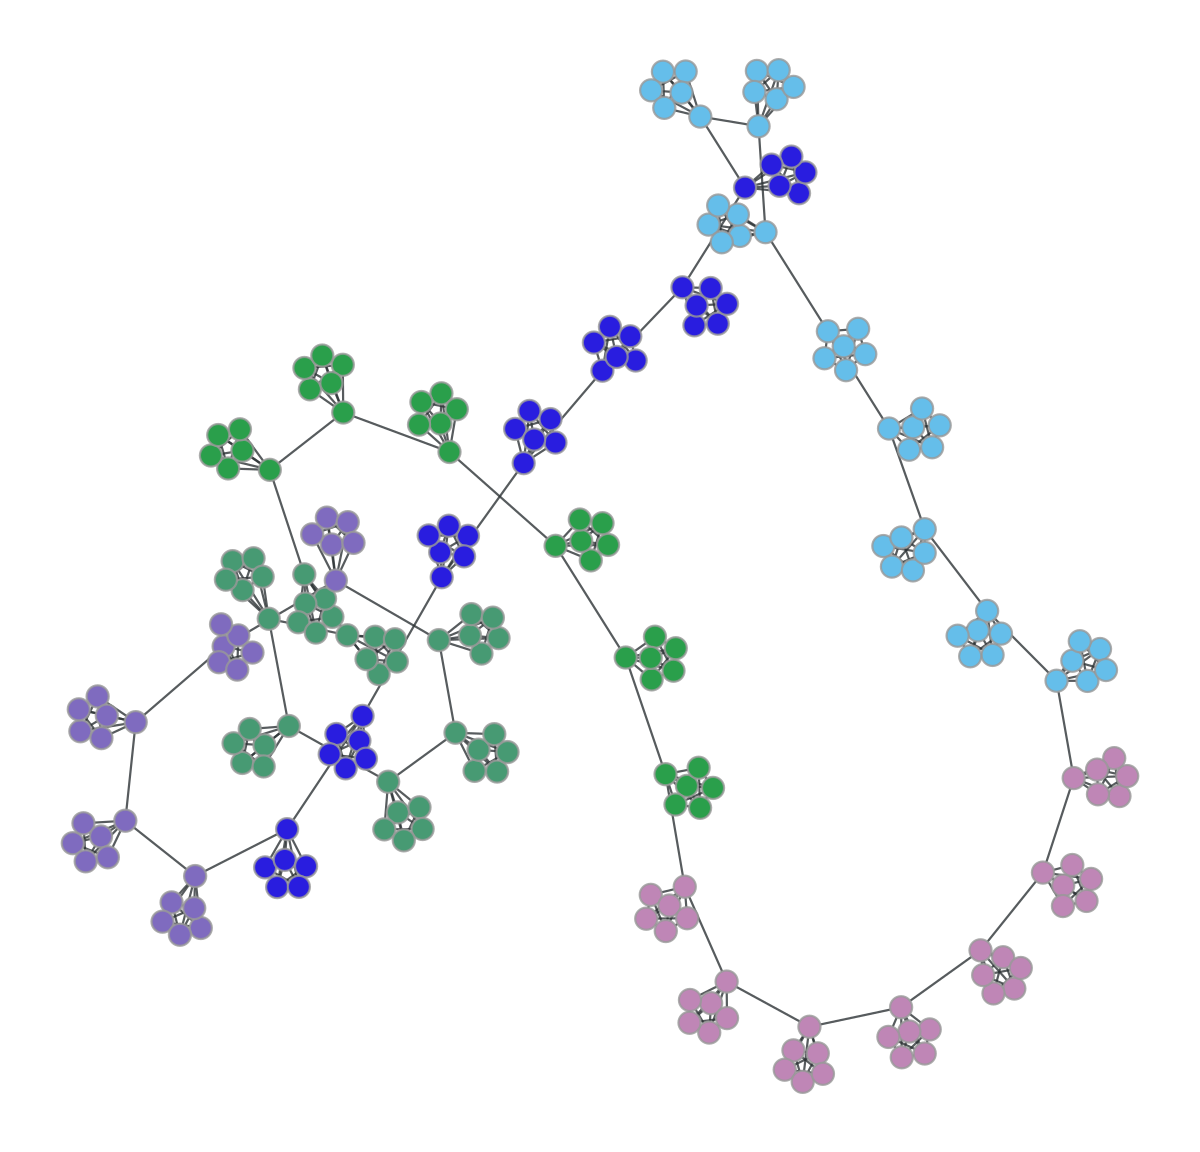

In [47]:
import random
old_to_new_id = {}
for vertex in graph.vertices():
    old_to_new_id[vpm_name[vertex]] = vertex
vertex_color_map = graph.new_vp("string")
for vertex in graph.vertices():
    vertex_color_map[vertex] = "#808080"
cluster_id_to_color_dict = {}
for line in leiden_cpm_0_001_clustering.value[0].content.tobytes().decode("utf-8").strip().split("\n"):
    node_id,cluster_id = line.strip().split()
    if cluster_id not in cluster_id_to_color_dict:
        cluster_id_to_color_dict[cluster_id] = f"#{random.randint(0, 0xFFFFFF):06x}"
    vertex_color_map[old_to_new_id[node_id]] = cluster_id_to_color_dict[cluster_id]
new_pos = gt.graph_draw(graph, pos=pos, vertex_fill_color=vertex_color_map)

You should notice that many of the adjacent cliques are labelled the same color, meaning that the 